In [1]:
import sys
sys.path.append("/opt/ml/level2_objectdetection-cv-09")
import torch
from torch.utils.data import Dataset
from PIL import Image, ImageDraw, ImageFont
import json
import os
import numpy as np
from utils.im_utils import Compose, ToTensor, RandomHorizontalFlip
import numpy as np
from collections import defaultdict
from dataloader.dataset import CustomDataset ,split_train_valid, get_all_annotation, get_json_data

In [2]:
with open('/opt/ml/dataset_for_yolo/train.json') as f:
    json_data = json.load(f)
print(json_data.keys())
print(json_data['info'])
print(len(json_data['annotations']))
print(json_data['annotations'][1])
print(json_data['images'][1])

dict_keys(['info', 'licenses', 'images', 'categories', 'annotations'])
{'year': 2021, 'version': '1.0', 'description': 'Recycle Trash', 'contributor': 'Upstage', 'url': None, 'date_created': '2021-02-02 01:10:00'}
23144
{'image_id': 1, 'category_id': 3, 'area': 10402.56, 'bbox': [0.0, 407.4, 57.6, 180.6], 'iscrowd': 0, 'id': 1}
{'width': 1024, 'height': 1024, 'file_name': 'train/0001.jpg', 'license': 0, 'flickr_url': None, 'coco_url': None, 'date_captured': '2021-01-10 16:30:39', 'id': 1}


In [3]:
data_root_dir = '/opt/ml/dataset'
json_data = get_json_data(data_root_dir)
    
json_anno = get_all_annotation(json_data)
print(json_anno[1])
for i in json_anno[1]:
    print(i)
train_info, val_info = split_train_valid(data_root_dir, json_data)


# data_transform = {
#         "train": Compose([ToTensor(), RandomHorizontalFlip(0.5)]),
#         "val": Compose([ToTensor()])
#     }


dataset = CustomDataset(train_info, json_anno)


[]


In [13]:
img,d = dataset.__getitem__(0)
d

{'boxes': tensor([[193.0000, 217.1000, 355.0000, 326.2000],
         [288.3000, 177.8000, 852.6000, 750.4000],
         [370.8000, 245.2000, 425.9000, 326.8000],
         [340.3000, 479.5000, 394.7000, 566.2000]]),
 'labels': tensor([1, 8, 6, 1], dtype=torch.int32),
 'image_id': tensor([0]),
 'area': tensor([ 17674.2012, 323118.1875,   4496.1602,   4716.4829]),
 'iscrowd': tensor([0, 0, 0, 0], dtype=torch.int32)}

In [14]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

['background', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']


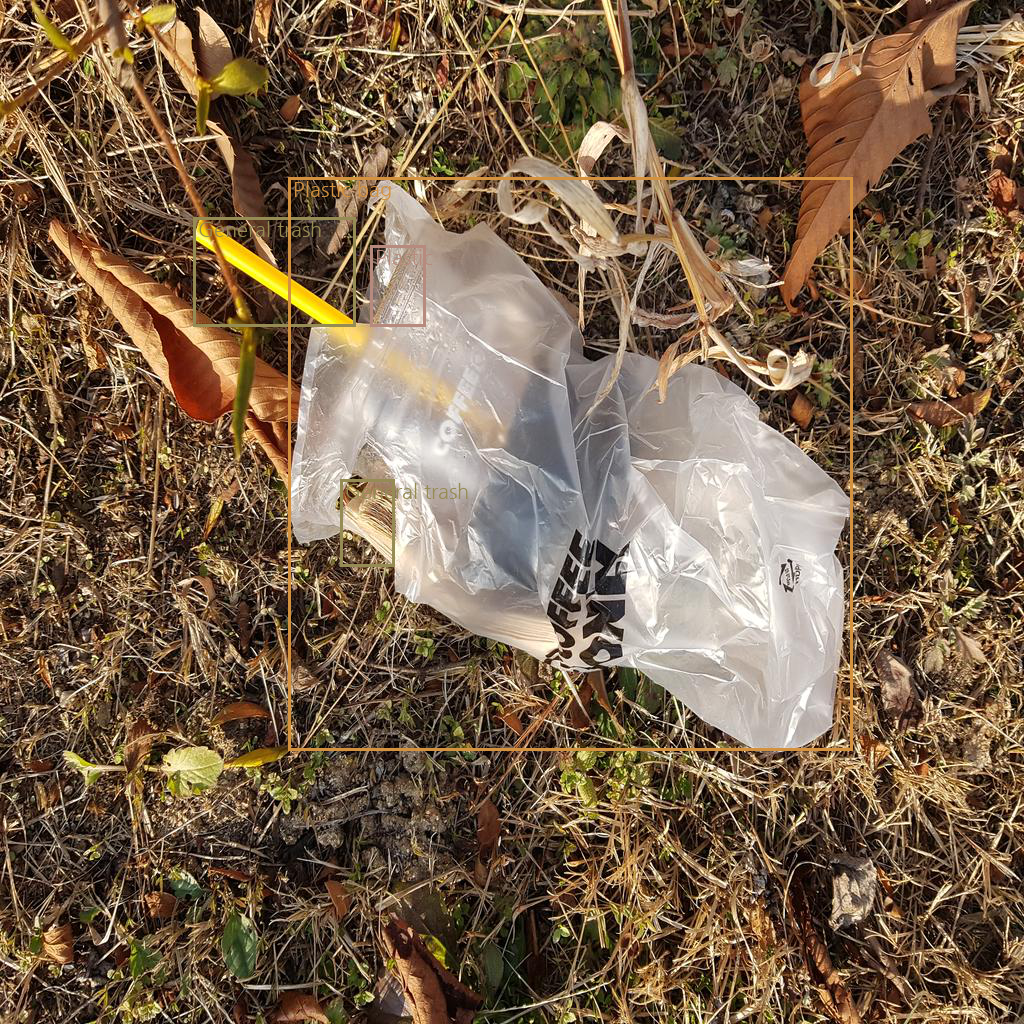

In [15]:
import random
# img = img.permute(1,2,0).numpy()
boxes = d['boxes'].numpy()
labels = d['labels'].numpy()
classes = dataset.classes
print(classes)
colors = [(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(len(classes))]
draw = ImageDraw.Draw(img)
for i in range(len(boxes)):
    box = boxes[i]
    label = labels[i]
    color = colors[label]
    font = ImageFont.truetype('/usr/share/fonts/truetype/nanum/NanumGothic.ttf',20)
    draw.rectangle(box, outline=color, width=3)
    draw.text((box[0]+5,box[1]),  classes[label], font=font, fill=color)
img.show()